In [16]:
### Word2Vec
"""
https://radimrehurek.com/gensim/models/word2vec.html
"""

from gensim.test.utils import common_texts
from gensim.models import Word2Vec

#print(common_texts)

model = Word2Vec(sentences=common_texts, window=5,
                min_count=1, workers=4)
model.save("word2vec.model")
model.vector_size

INFO - 10:02:54: collecting all words and their counts
INFO - 10:02:54: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 10:02:54: collected 12 word types from a corpus of 29 raw words and 9 sentences
INFO - 10:02:54: Loading a fresh vocabulary
INFO - 10:02:54: effective_min_count=1 retains 12 unique words (100% of original 12, drops 0)
INFO - 10:02:54: effective_min_count=1 leaves 29 word corpus (100% of original 29, drops 0)
INFO - 10:02:54: deleting the raw counts dictionary of 12 items
INFO - 10:02:54: sample=0.001 downsamples 12 most-common words
INFO - 10:02:54: downsampling leaves estimated 3 word corpus (12.1% of prior 29)
INFO - 10:02:54: estimated required memory for 12 words and 100 dimensions: 15600 bytes
INFO - 10:02:54: resetting layer weights
INFO - 10:02:54: training model with 4 workers on 12 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
INFO - 10:02:54: worker thread finished; awaiting finish of 3 more threads
IN

100

In [2]:
model.train([["hello", "world"]], total_examples=1, epochs=1)

(0, 2)

In [3]:
vector = model.wv['computer']
print(vector)

human = model.wv['human'] # human is in common_texts
print(human)

sims = model.wv.most_similar('computer', topn=10)
sims

[ 4.0328880e-03 -4.7643200e-04 -2.9330843e-03  1.2155942e-03
  2.7958915e-04  4.9020788e-03  4.2135976e-03  1.5155092e-04
 -7.4922643e-04  2.9222181e-03 -4.8488709e-03 -4.5449035e-03
 -9.6133468e-04  3.7523687e-03  2.3289085e-03  1.8588760e-03
 -3.7622431e-03  2.9579760e-03 -3.3678685e-03  6.9760811e-04
 -1.4749439e-03  4.8693470e-03  4.9983710e-03 -3.2651962e-03
  4.8790728e-03 -4.5331242e-03  1.3714916e-03  8.2827755e-04
 -1.5991740e-03 -4.0893643e-03  6.7457859e-04 -8.0832740e-04
 -2.6329504e-03 -1.9538649e-03 -8.8238492e-05  3.9008639e-03
  1.4373786e-03 -3.6960421e-03  4.8825187e-03 -3.9614015e-03
  7.0623832e-04  2.9878010e-04 -1.6018143e-03  2.2958296e-03
 -2.3164814e-03  1.9264754e-03 -1.9841662e-03 -2.7257558e-03
 -2.3720532e-03  1.8911383e-03 -1.1588129e-03 -2.8298574e-03
  4.8438255e-03 -4.4083018e-03 -2.9227212e-03  1.4054575e-03
  6.9359102e-04 -1.7572867e-03 -1.2093934e-04 -1.4922118e-03
 -3.8766384e-03 -3.8092108e-03  2.0385589e-03 -4.4817147e-03
 -4.1268705e-03 -2.13077

[('system', 0.20733454823493958),
 ('minors', 0.13676667213439941),
 ('trees', 0.07508991658687592),
 ('eps', 0.06454212963581085),
 ('user', 0.025251179933547974),
 ('interface', 0.017709560692310333),
 ('graph', -0.010241875424981117),
 ('time', -0.03116779774427414),
 ('survey', -0.03778702765703201),
 ('human', -0.11431632936000824)]

In [4]:
from gensim.models import KeyedVectors

# Store just the words + their trained embeddings
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")

# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load('word2vec.wordvectors', mmap='r')

print(wv['computer'])

for word in model.wv.vocab:
    print(word)

[ 4.0328880e-03 -4.7643200e-04 -2.9330843e-03  1.2155942e-03
  2.7958915e-04  4.9020788e-03  4.2135976e-03  1.5155092e-04
 -7.4922643e-04  2.9222181e-03 -4.8488709e-03 -4.5449035e-03
 -9.6133468e-04  3.7523687e-03  2.3289085e-03  1.8588760e-03
 -3.7622431e-03  2.9579760e-03 -3.3678685e-03  6.9760811e-04
 -1.4749439e-03  4.8693470e-03  4.9983710e-03 -3.2651962e-03
  4.8790728e-03 -4.5331242e-03  1.3714916e-03  8.2827755e-04
 -1.5991740e-03 -4.0893643e-03  6.7457859e-04 -8.0832740e-04
 -2.6329504e-03 -1.9538649e-03 -8.8238492e-05  3.9008639e-03
  1.4373786e-03 -3.6960421e-03  4.8825187e-03 -3.9614015e-03
  7.0623832e-04  2.9878010e-04 -1.6018143e-03  2.2958296e-03
 -2.3164814e-03  1.9264754e-03 -1.9841662e-03 -2.7257558e-03
 -2.3720532e-03  1.8911383e-03 -1.1588129e-03 -2.8298574e-03
  4.8438255e-03 -4.4083018e-03 -2.9227212e-03  1.4054575e-03
  6.9359102e-04 -1.7572867e-03 -1.2093934e-04 -1.4922118e-03
 -3.8766384e-03 -3.8092108e-03  2.0385589e-03 -4.4817147e-03
 -4.1268705e-03 -2.13077

In [9]:
### Kaggle tutorial
"""https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial"""

In [18]:
import re  # preprocessing
import pandas as pd  # data handling
from time import time  # mesure time
from collections import defaultdict  # for word frequencies

import spacy  # preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [19]:
df = pd.read_csv('/Users/Boulot/Documents/ScienceAtHome/Datasets/simpsons_dataset.csv')
print(df.shape)
df.head()

(158314, 2)


,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...


In [20]:
df.isnull().sum()  # number of empty values for each column

raw_character_text    17814
spoken_words          26459
dtype: int64

In [21]:
df = df.dropna().reset_index(drop=True)  # remove these missing values
print(df.shape)
df.isnull().sum()

(131853, 2)


raw_character_text    0
spoken_words          0
dtype: int64

In [22]:
## Cleaning

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [23]:
# remove non alphabetic characters

brief_cleaning = (re.sub("[^A-Za-z]+", ' ', str(row)).lower() for row in df['spoken_words'])

t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.77 mins


In [24]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
print(df_clean.shape)
df_clean.head()

(92163, 1)


,clean
0,actually little disease magazine news show s n...
1,s mr bergstrom
2,don t know d sure like talk didn t touch lesso...
3,life worth live
4,poll open end recess case decide thought will ...


In [25]:
## Bigrams

from gensim.models.phrases import Phrases, Phraser

sent = [row.split() for row in df_clean['clean']]
phrases = Phrases(sent, min_count=30, progress_per=10000)

INFO - 10:09:29: collecting all words and their counts
INFO - 10:09:29: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 10:09:29: PROGRESS: at sentence #10000, processed 67820 words and 50878 word types
INFO - 10:09:29: PROGRESS: at sentence #20000, processed 141208 words and 96422 word types
INFO - 10:09:29: PROGRESS: at sentence #30000, processed 208934 words and 133149 word types
INFO - 10:09:29: PROGRESS: at sentence #40000, processed 271339 words and 165836 word types
INFO - 10:09:29: PROGRESS: at sentence #50000, processed 335288 words and 198114 word types
INFO - 10:09:30: PROGRESS: at sentence #60000, processed 402279 words and 231079 word types
INFO - 10:09:30: PROGRESS: at sentence #70000, processed 469474 words and 263582 word types
INFO - 10:09:30: PROGRESS: at sentence #80000, processed 536222 words and 295293 word types
INFO - 10:09:30: PROGRESS: at sentence #90000, processed 604320 words and 325523 word types
INFO - 10:09:30: collected 331706 word typ

In [26]:
bigram = Phraser(phrases)
sentences = bigram[sent]

INFO - 10:09:36: source_vocab length 331706
INFO - 10:09:37: Phraser built with 132 phrasegrams


In [27]:
## Frequencies

word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
print(len(word_freq))
sorted(word_freq, key=word_freq.get, reverse=True)[:10]
# verbes conjugués tjs présents :\

29444


['s', 'm', 'oh', 'don_t', 'will', 'like', 'know', 'think', 'hey', 'good']

In [28]:
## Training the model

import multiprocessing
from gensim.models import Word2Vec

cores = multiprocessing.cpu_count() # Count the number of cores in a computer
print(cores)

8


In [29]:
# initialize the model
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

# http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/

In [30]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 10:09:53: collecting all words and their counts
INFO - 10:09:53: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 10:09:53: PROGRESS: at sentence #10000, processed 64391 words, keeping 9073 word types
INFO - 10:09:53: PROGRESS: at sentence #20000, processed 134230 words, keeping 13856 word types
INFO - 10:09:53: PROGRESS: at sentence #30000, processed 198748 words, keeping 16785 word types
INFO - 10:09:53: PROGRESS: at sentence #40000, processed 258358 words, keeping 19389 word types
INFO - 10:09:53: PROGRESS: at sentence #50000, processed 319432 words, keeping 21632 word types
INFO - 10:09:54: PROGRESS: at sentence #60000, processed 383355 words, keeping 23764 word types
INFO - 10:09:54: PROGRESS: at sentence #70000, processed 447670 words, keeping 25715 word types
INFO - 10:09:54: PROGRESS: at sentence #80000, processed 511503 words, keeping 27588 word types
INFO - 10:09:54: PROGRESS: at sentence #90000, processed 576457 words, keeping 29154 word types


Time to build vocab: 0.03 mins


In [31]:
# train the model

t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 10:09:58: training model with 7 workers on 3377 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 10:09:59: EPOCH 1 - PROGRESS: at 78.05% examples, 168408 words/s, in_qsize 0, out_qsize 0
INFO - 10:09:59: worker thread finished; awaiting finish of 6 more threads
INFO - 10:09:59: worker thread finished; awaiting finish of 5 more threads
INFO - 10:09:59: worker thread finished; awaiting finish of 4 more threads
INFO - 10:09:59: worker thread finished; awaiting finish of 3 more threads
INFO - 10:09:59: worker thread finished; awaiting finish of 2 more threads
INFO - 10:09:59: worker thread finished; awaiting finish of 1 more threads
INFO - 10:09:59: worker thread finished; awaiting finish of 0 more threads
INFO - 10:09:59: EPOCH - 1 : training on 590986 raw words (218125 effective words) took 1.3s, 163444 effective words/s
INFO - 10:10:00: EPOCH 2 - PROGRESS: at 81.36% examples, 175436 words/s, in_qsize 0, out_qsize 0
INFO - 10:10:01: worker thre

INFO - 10:10:13: EPOCH 12 - PROGRESS: at 74.64% examples, 160964 words/s, in_qsize 0, out_qsize 0
INFO - 10:10:13: worker thread finished; awaiting finish of 6 more threads
INFO - 10:10:13: worker thread finished; awaiting finish of 5 more threads
INFO - 10:10:13: worker thread finished; awaiting finish of 4 more threads
INFO - 10:10:13: worker thread finished; awaiting finish of 3 more threads
INFO - 10:10:13: worker thread finished; awaiting finish of 2 more threads
INFO - 10:10:13: worker thread finished; awaiting finish of 1 more threads
INFO - 10:10:13: worker thread finished; awaiting finish of 0 more threads
INFO - 10:10:13: EPOCH - 12 : training on 590986 raw words (218611 effective words) took 1.3s, 168765 effective words/s
INFO - 10:10:14: EPOCH 13 - PROGRESS: at 72.97% examples, 158348 words/s, in_qsize 0, out_qsize 0
INFO - 10:10:15: worker thread finished; awaiting finish of 6 more threads
INFO - 10:10:15: worker thread finished; awaiting finish of 5 more threads
INFO - 10

INFO - 10:10:28: worker thread finished; awaiting finish of 6 more threads
INFO - 10:10:28: worker thread finished; awaiting finish of 5 more threads
INFO - 10:10:28: worker thread finished; awaiting finish of 4 more threads
INFO - 10:10:28: worker thread finished; awaiting finish of 3 more threads
INFO - 10:10:28: worker thread finished; awaiting finish of 2 more threads
INFO - 10:10:28: worker thread finished; awaiting finish of 1 more threads
INFO - 10:10:28: worker thread finished; awaiting finish of 0 more threads
INFO - 10:10:28: EPOCH - 23 : training on 590986 raw words (218710 effective words) took 1.3s, 168694 effective words/s
INFO - 10:10:29: EPOCH 24 - PROGRESS: at 81.36% examples, 176330 words/s, in_qsize 0, out_qsize 0
INFO - 10:10:29: worker thread finished; awaiting finish of 6 more threads
INFO - 10:10:29: worker thread finished; awaiting finish of 5 more threads
INFO - 10:10:29: worker thread finished; awaiting finish of 4 more threads
INFO - 10:10:29: worker thread f

Time to train the model: 0.64 mins


In [32]:
"""As we do not plan to train the model any further, we are calling init_sims(),
which will make the model much more memory-efficient"""

w2v_model.init_sims(replace=True)

INFO - 10:11:05: precomputing L2-norms of word weight vectors


In [34]:
## Exploring the model

# most similar

wv = w2v_model.wv

print('homer')
print(wv.most_similar(positive=['homer'], topn=3))

print("")
print('homer_simpson')
print(wv.most_similar(positive=['homer_simpson']))

homer
[('depressed', 0.7674498558044434), ('thinking', 0.7189080715179443), ('marge', 0.7133601903915405)]

homer_simpson
[('congratulation', 0.7400599718093872), ('select', 0.7390156984329224), ('governor', 0.7345747351646423), ('council', 0.7275370359420776), ('pleased', 0.7248613238334656), ('appearance', 0.7191231846809387), ('recent', 0.7188793420791626), ('robert', 0.714475154876709), ('easily', 0.6989107131958008), ('sir', 0.6988564729690552)]


In [17]:
# similarity

print(wv.similarity("maggie", 'baby'))

# doesn't match

print(wv.doesnt_match(['jimbo', 'milhouse', 'kearney']))

# king -man + woman
print(wv.most_similar(positive=["woman", "bart"], negative=["man"], topn=3))

0.7227211
milhouse
[('lisa', 0.6899698376655579), ('parent', 0.6541465520858765), ('assignment', 0.6504457592964172)]


/Users/Boulot/tuto_gensim/venv/lib/python3.8/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [30]:
## Visualization

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [28]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA().fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

INFO - 14:17:23: findfont: Found a missing font file.  Rebuilding cache.
INFO - 14:17:23: Generating new fontManager, this may take some time...
INFO - 14:17:23: Failed to extract font properties from /System/Library/Fonts/Supplemental/NISC18030.ttf: In FT2Font: Could not set the fontsize (error code 0x17)
INFO - 14:17:23: Failed to extract font properties from /System/Library/Fonts/LastResort.otf: tuple indices must be integers or slices, not str
INFO - 14:17:23: Failed to extract font properties from /System/Library/Fonts/Apple Color Emoji.ttc: In FT2Font: Could not set the fontsize (error code 0x17)
INFO - 14:17:23: findfont: Found a missing font file.  Rebuilding cache.
INFO - 14:17:23: Generating new fontManager, this may take some time...
INFO - 14:17:24: Failed to extract font properties from /System/Library/Fonts/Supplemental/NISC18030.ttf: In FT2Font: Could not set the fontsize (error code 0x17)
INFO - 14:17:24: Failed to extract font properties from /System/Library/Fonts/Last

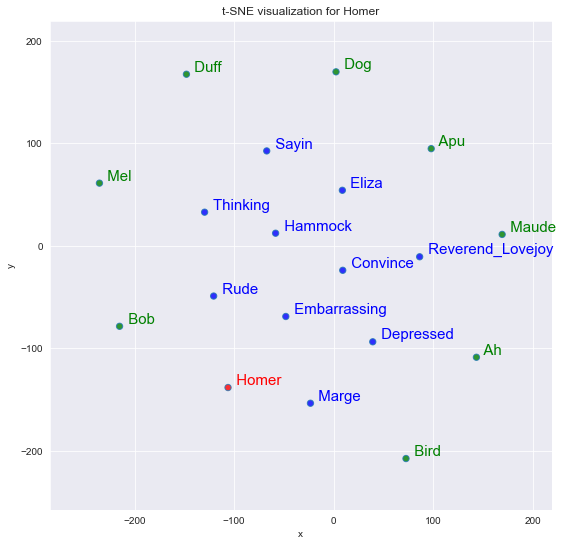

In [31]:
tsnescatterplot(w2v_model, 'homer', ['dog', 'bird', 'ah', 'maude', 'bob', 'mel', 'apu', 'duff'])

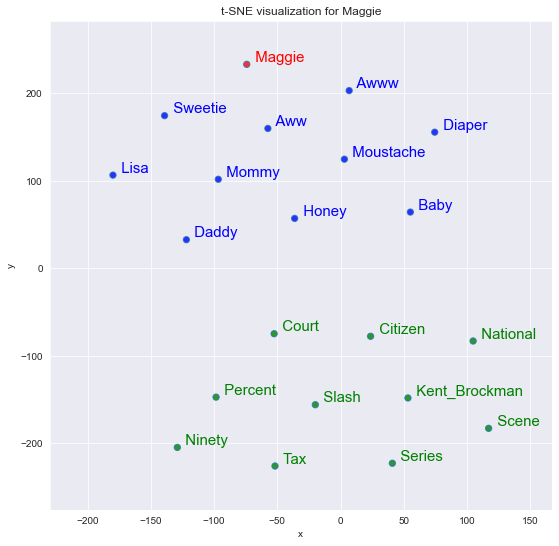

In [32]:
# most dissimilar
tsnescatterplot(w2v_model, 'maggie', [i[0] for i in w2v_model.wv.most_similar(negative=["maggie"])])

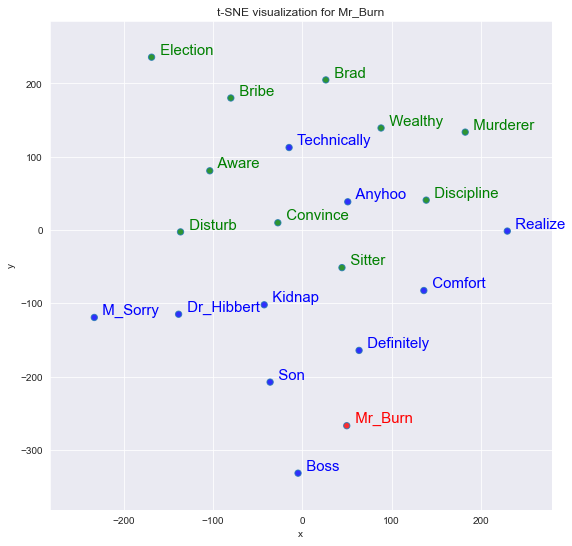

In [33]:
# 11th to 20th most similar
tsnescatterplot(w2v_model, "mr_burn", [t[0] for t in w2v_model.wv.most_similar(positive=["mr_burn"], topn=20)][10:])